<a href="https://www.kaggle.com/code/mahubhanatrevor/churn-data-cleaning-filtering-aggregating-explor?scriptVersionId=200495781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-bank-abc/churn_ABC Bank.csv


In [3]:
pd.set_option('display.max_column',None)

In [4]:
df = pd.read_csv('/kaggle/input/churn-bank-abc/churn_ABC Bank.csv',index_col = "RowNumber")

In [5]:
df.shape

(10000, 13)

In [6]:
df.head(15)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [7]:
df.tail(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### checking for missing values,handling them ,renaming columns if neccessary, dropping irrelevant columns,change the values to the well understanding format

In [12]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df[['Age','Balance','EstimatedSalary','CreditScore']].median()

Age                    37.000
Balance             97198.540
EstimatedSalary    100193.915
CreditScore           652.000
dtype: float64

In [14]:
df.drop(columns = ['CustomerId','Surname'],inplace = True)

In [15]:
df = df.rename(columns = {'Geography':'Country_lived','Tenure':'Time_worked_with_bank(yrs)','NumOfProducts':'Products_Obtained_through_bank','EstimatedSalary':'Estimated_Salary','IsActiveMember':'Is_Active_Member','HasCrCard':'Has_CrCard'})

In [16]:
df['Has_CrCard'] = df['Has_CrCard'].replace({0:'No', 1: 'Yes'})

In [17]:
df['Is_Active_Member'] = df['Is_Active_Member'].replace({1:'Yes',0:'No'})

In [18]:
df['Exited'] = df['Exited'].replace({1:'Yes',0:'No',}) 

In [19]:
df.head(20) # AFTER SOME  FEW CHANGES

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
2,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
3,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
4,699,France,Female,39,1,0.00,2,No,No,93826.63,No
5,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
6,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
7,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No
8,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
9,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No


In [20]:
df.dtypes

CreditScore                         int64
Country_lived                      object
Gender                             object
Age                                 int64
Time_worked_with_bank(yrs)          int64
Balance                           float64
Products_Obtained_through_bank      int64
Has_CrCard                         object
Is_Active_Member                   object
Estimated_Salary                  float64
Exited                             object
dtype: object

#filtering ,aggregating,sorting ,exploration

In [21]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

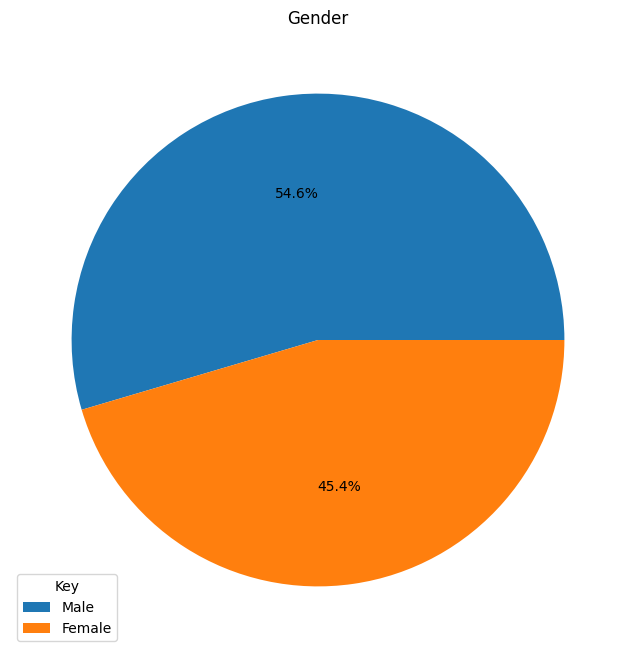

In [22]:
gender_plot=df['Gender'].value_counts(normalize=True)
plt.figure(figsize=(10,8))
plt.pie(gender_plot,autopct=('%1.1f%%'))
plt.title("Gender")
plt.legend(gender_plot.index,title='Key',loc='lower left')#bbox_to_anchor=(1,0,0.5,1)
plt.show()


In [23]:
df.loc[df['Gender']=='Female']

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
2,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
3,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
4,699,France,Female,39,1,0.00,2,No,No,93826.63,No
5,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9983,655,Germany,Female,46,7,137145.12,1,Yes,No,115146.40,Yes
9992,597,France,Female,53,4,88381.21,1,Yes,No,69384.71,Yes
9995,800,France,Female,29,2,0.00,2,No,No,167773.55,No


In [24]:
female_exited1=(df['Gender']=='Female') & (df['Exited']=='Yes')

In [25]:
df.loc[female_exited1,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
1,Female,Yes,2
3,Female,Yes,8
8,Female,Yes,4
23,Female,Yes,4
31,Female,Yes,3
...,...,...,...
9957,Female,Yes,10
9961,Female,Yes,9
9983,Female,Yes,7


In [26]:
df.loc[female_exited1,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()

Gender  Exited  Time_worked_with_bank(yrs)
Female  Yes     1                             130
                5                             124
                3                             119
                2                             113
                9                             110
                8                             109
                4                             107
                6                             106
                7                             100
                10                             66
                0                              55
Name: count, dtype: int64

In [27]:
female_exited=(df['Gender']=='Female') & (df['Exited']=='Yes') & (df['Time_worked_with_bank(yrs)'] >=5)

In [28]:
df.loc[female_exited,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
3,Female,Yes,8
42,Female,Yes,8
47,Female,Yes,9
48,Female,Yes,9
91,Female,Yes,5
...,...,...,...
9935,Female,Yes,10
9957,Female,Yes,10
9961,Female,Yes,9


In [29]:
df.loc[female_exited,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()

Gender  Exited  Time_worked_with_bank(yrs)
Female  Yes     5                             124
                9                             110
                8                             109
                6                             106
                7                             100
                10                             66
Name: count, dtype: int64

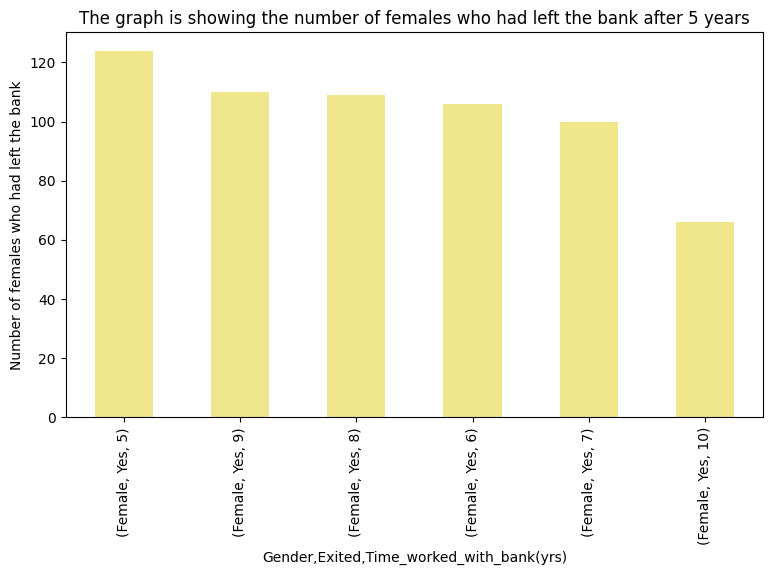

In [30]:
plt.figure(figsize=(9,5))
ax=df.loc[female_exited,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts().plot(kind='bar',title='The graph is showing the number of females who had left the bank after 5 years',color='khaki')
ax.set_ylabel('Number of females who had left the bank')
plt.show()

In [31]:
female_exited2=(df['Gender']=='Female') & (df['Exited']=='Yes') &  (df['Time_worked_with_bank(yrs)'] <5)
df.loc[female_exited2,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
1,Female,Yes,2
8,Female,Yes,4
23,Female,Yes,4
31,Female,Yes,3
36,Female,Yes,0
...,...,...,...
9878,Female,Yes,3
9885,Female,Yes,4
9896,Female,Yes,3


In [32]:
df.loc[female_exited2,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()

Gender  Exited  Time_worked_with_bank(yrs)
Female  Yes     1                             130
                3                             119
                2                             113
                4                             107
                0                              55
Name: count, dtype: int64

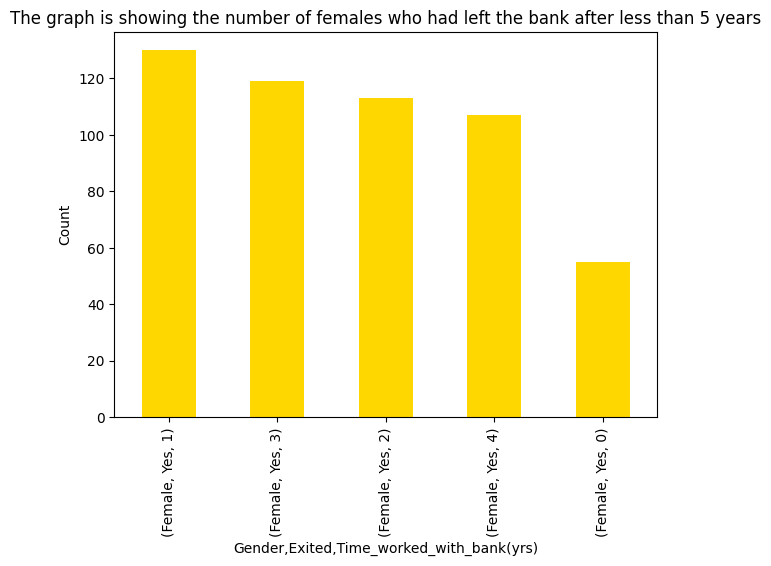

In [33]:
plt.figure(figsize=(7,5))
female_plt=df.loc[female_exited2,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()
ax=female_plt.plot(kind='bar',title='The graph is showing the number of females who had left the bank after less than 5 years',color='gold')
ax.set_ylabel('Count')
plt.show()

In [34]:
male_exited=(df['Gender']=='Male') & (df['Exited']=='Yes') 

In [35]:
df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
6,Male,Yes,8
17,Male,Yes,1
54,Male,Yes,8
55,Male,Yes,1
71,Male,Yes,2
...,...,...,...
9948,Male,Yes,1
9963,Male,Yes,9
9976,Male,Yes,1


In [36]:
male_exited=(df['Gender']=='Male') & (df['Exited']=='Yes') &  (df['Time_worked_with_bank(yrs)'] >=5)

In [37]:
df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
6,Male,Yes,8
54,Male,Yes,8
110,Male,Yes,9
115,Male,Yes,9
126,Male,Yes,9
...,...,...,...
9853,Male,Yes,6
9880,Male,Yes,9
9911,Male,Yes,7


In [38]:
df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()

Gender  Exited  Time_worked_with_bank(yrs)
Male    Yes     9                             103
                6                              90
                8                              88
                5                              85
                7                              77
                10                             35
Name: count, dtype: int64

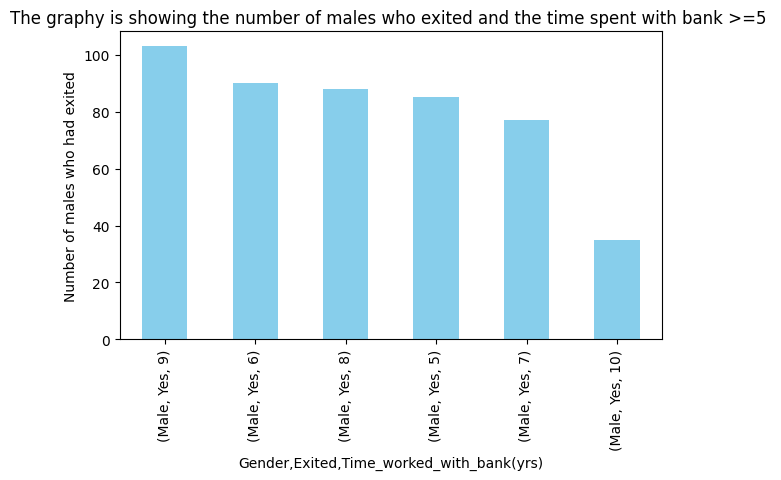

In [39]:
plt.figure(figsize=(7,4))
ax=df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts().plot(kind='bar',title='The graphy is showing the number of males who exited and the time spent with bank >=5 ',color='skyblue')
ax.set_ylabel('Number of males who had exited')
plt.show()

In [40]:
male_exited=(df['Gender']=='Male') & (df['Exited']=='Yes') &  (df['Time_worked_with_bank(yrs)'] <5)
df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']]

,Gender,Exited,Time_worked_with_bank(yrs)
RowNumber,,,
17,Male,Yes,1
55,Male,Yes,1
71,Male,Yes,2
87,Male,Yes,3
128,Male,Yes,0
...,...,...,...
9906,Male,Yes,2
9948,Male,Yes,1
9976,Male,Yes,1


In [41]:
male_plt=df.loc[male_exited,['Gender','Exited','Time_worked_with_bank(yrs)']].value_counts()

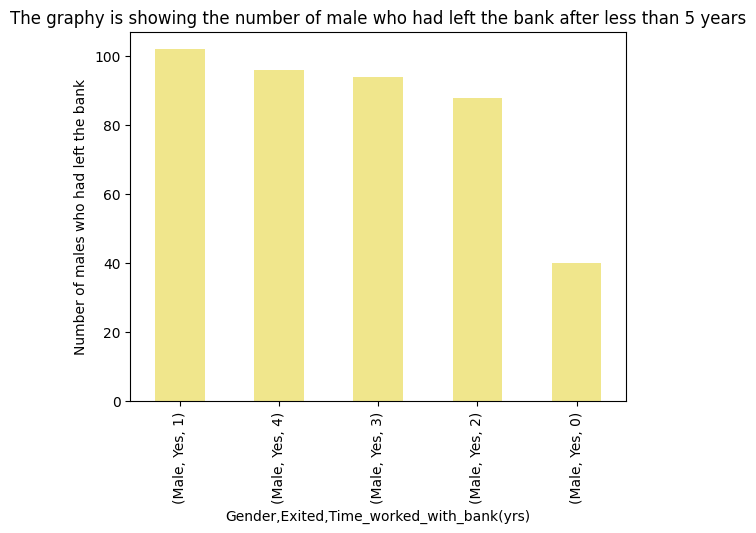

In [42]:
ax=male_plt.plot(kind='bar',color='khaki',title='The graphy is showing the number of male who had left the bank after less than 5 years')
ax.set_ylabel('Number of males who had left the bank')
plt.show()

In [43]:
df['Exited'].value_counts(normalize=True)

Exited
No     0.7963
Yes    0.2037
Name: proportion, dtype: float64

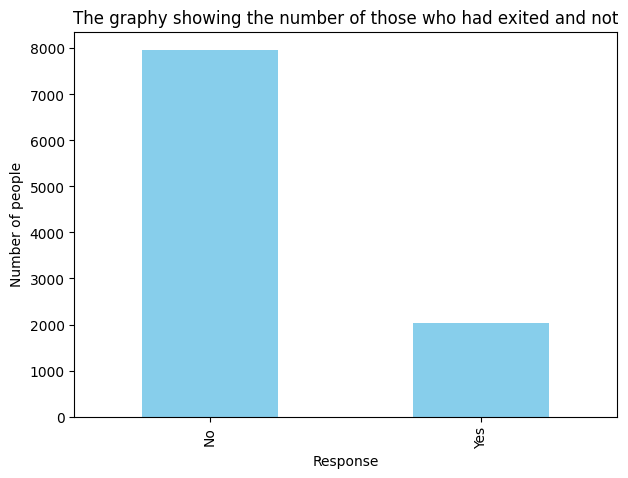

In [44]:
exited=df['Exited'].value_counts()
plt.figure(figsize=(7,5))
ax=exited.plot(kind='bar',title='The graphy showing the number of those who had exited and not',color='skyblue')
ax.set_ylabel('Number of people')
ax.set_xlabel('Response')
plt.show()

In [45]:
exited_filter=(df['Exited']=='Yes') & (df['Time_worked_with_bank(yrs)'] >=5)

In [46]:
df.loc[exited_filter,['Exited','Time_worked_with_bank(yrs)']]

,Exited,Time_worked_with_bank(yrs)
RowNumber,,
3,Yes,8
6,Yes,8
42,Yes,8
47,Yes,9
48,Yes,9
...,...,...
9957,Yes,10
9961,Yes,9
9963,Yes,9


In [47]:
df.loc[exited_filter,['Exited','Time_worked_with_bank(yrs)']].value_counts()

Exited  Time_worked_with_bank(yrs)
Yes     9                             213
        5                             209
        8                             197
        6                             196
        7                             177
        10                            101
Name: count, dtype: int64

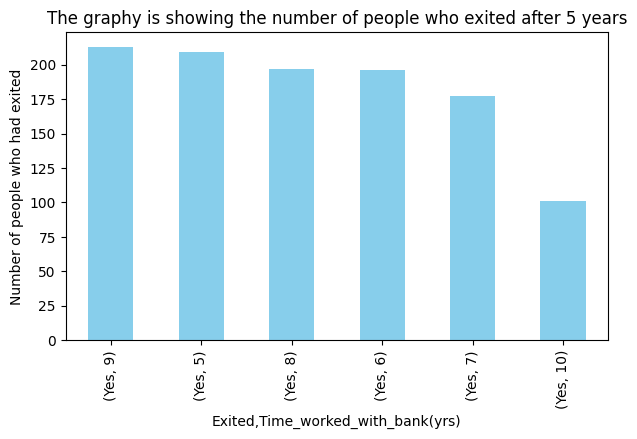

In [48]:
plt.figure(figsize=(7,4))
ax=df.loc[exited_filter,['Exited','Time_worked_with_bank(yrs)']].value_counts().plot(kind='bar',title='The graphy is showing the number of people who exited after 5 years',color='skyblue')
ax.set_ylabel('Number of people who had exited')
plt.show()

In [49]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [50]:
df['Estimated_Salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Estimated_Salary, dtype: float64

In [51]:
df.query('Estimated_Salary==11.580000')

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
2363,709,Germany,Male,45,4,122917.71,1,Yes,Yes,11.58,Yes


In [52]:
df.query('CreditScore>500')

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
2,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
3,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
4,699,France,Female,39,1,0.00,2,No,No,93826.63,No
5,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9997,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9998,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes


In [53]:
exited_credit_score=(df['Exited']=='Yes') & (df['CreditScore'] >=500) & (df['Is_Active_Member']=='Yes') 

In [54]:
df.loc[exited_credit_score,['CreditScore','Exited','Is_Active_Member']]

,CreditScore,Exited,Is_Active_Member
RowNumber,,,
1,619,Yes,Yes
47,829,Yes,Yes
48,637,Yes,Yes
91,647,Yes,Yes
105,670,Yes,Yes
...,...,...,...
9925,632,Yes,Yes
9935,692,Yes,Yes
9948,615,Yes,Yes


In [55]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [56]:
balance_filter=(df['Balance']>=50000)  & (df['Exited']=="Yes")

In [57]:
df.loc[balance_filter]

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
3,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
6,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
8,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
17,653,Germany,Male,58,1,132602.88,1,Yes,No,5097.67,Yes
36,475,France,Female,45,0,134264.04,1,Yes,No,27822.99,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9976,610,Germany,Male,50,1,113957.01,2,Yes,No,196526.55,Yes
9982,498,Germany,Male,42,3,152039.70,1,Yes,Yes,53445.17,Yes
9983,655,Germany,Female,46,7,137145.12,1,Yes,No,115146.40,Yes


In [58]:
df.Country_lived.value_counts(normalize=True)

Country_lived
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [59]:
country_pie=df.Country_lived.value_counts(normalize=True)

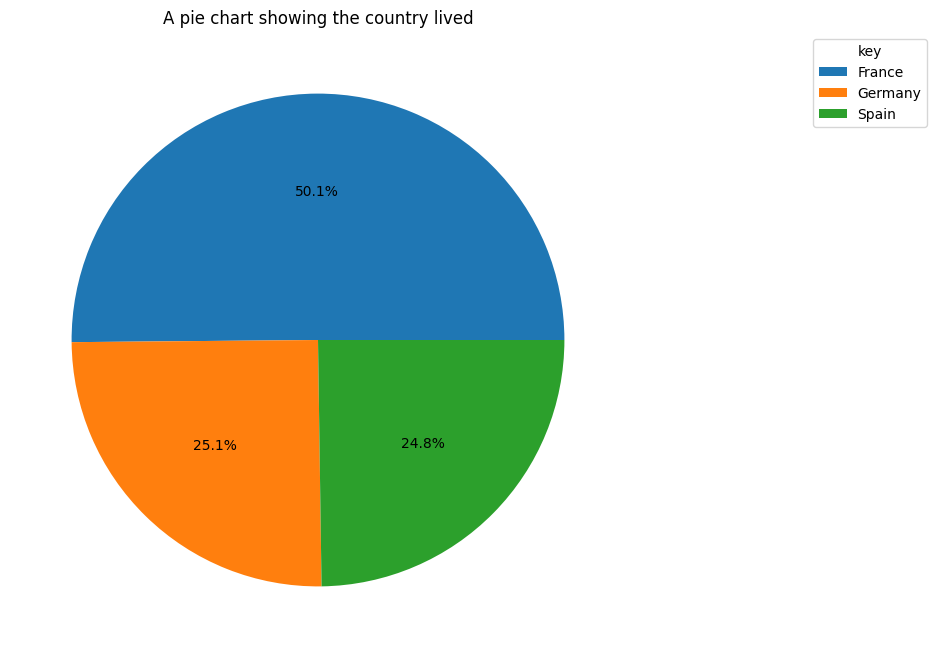

In [60]:
plt.figure(figsize=(10,8))
plt.pie(country_pie,autopct='%1.1f%%')
plt.title('A pie chart showing the country lived')
plt.legend(country_pie.index,title='key',loc='upper right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [61]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [62]:
df.query('Age==92')

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
6444,753,France,Male,92,3,121513.31,1,No,Yes,195563.99,No
6760,705,France,Male,92,1,126076.24,2,Yes,Yes,34436.83,No


In [63]:
df.query("Age==18")

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
747,844,France,Male,18,2,160980.03,1,No,No,145936.28,No
1620,656,France,Male,18,10,151762.74,1,No,Yes,127014.32,No
1679,570,France,Female,18,4,82767.42,1,Yes,No,71811.90,No
2022,716,Germany,Female,18,3,128743.80,1,No,No,197322.13,No
2137,727,France,Male,18,4,133550.67,1,Yes,Yes,46941.41,No
2142,674,France,Male,18,7,0.00,2,Yes,Yes,55753.12,Yes
3331,738,France,Male,18,4,0.00,2,Yes,Yes,47799.15,No
3513,806,Spain,Male,18,3,0.00,2,Yes,Yes,86994.54,No
3518,771,Spain,Male,18,1,0.00,2,No,No,41542.95,No


In [64]:
df.Products_Obtained_through_bank.value_counts(normalize=True)

Products_Obtained_through_bank
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64

In [65]:
pie_chart=df.Products_Obtained_through_bank.value_counts(normalize=True)

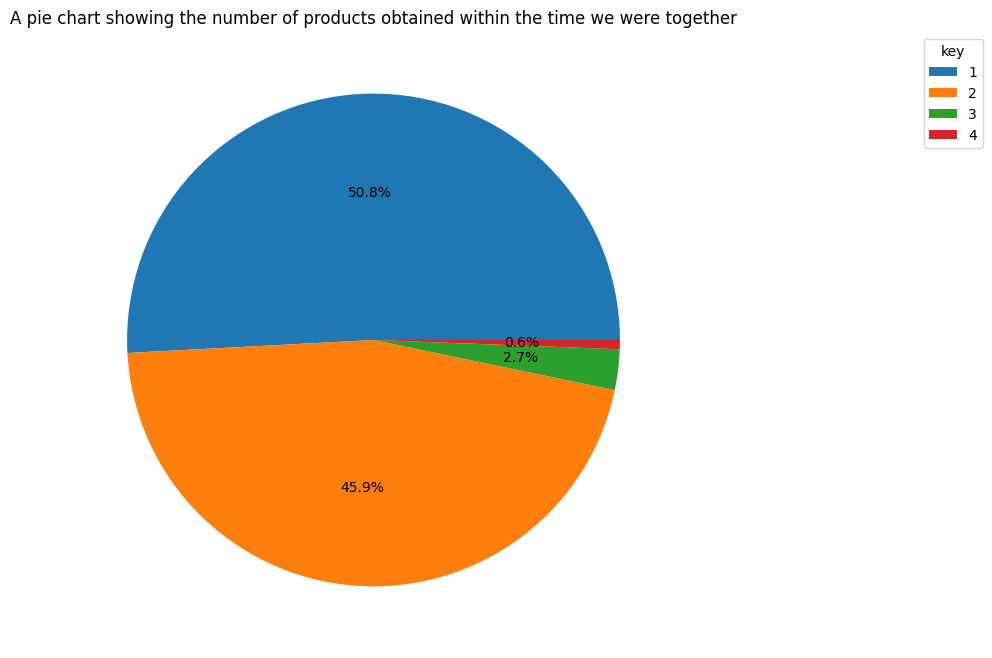

In [66]:
plt.figure(figsize=(20,8))
plt.pie(pie_chart,autopct='%1.1f%%')
plt.title('A pie chart showing the number of products obtained within the time we were together')
plt.legend(pie_chart.index,title='key',loc='upper right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [67]:
df.sort_values(by=['Age','Balance','Time_worked_with_bank(yrs)']).head(20)  # by  default it takes all as True

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
3518,771,Spain,Male,18,1,0.00,2,No,No,41542.95,No
3513,806,Spain,Male,18,3,0.00,2,Yes,Yes,86994.54,No
3331,738,France,Male,18,4,0.00,2,Yes,Yes,47799.15,No
7335,616,France,Male,18,6,0.00,2,Yes,Yes,27308.58,No
2142,674,France,Male,18,7,0.00,2,Yes,Yes,55753.12,Yes
9573,644,Spain,Male,18,7,0.00,1,No,Yes,59645.24,Yes
8523,644,Spain,Male,18,8,0.00,2,Yes,No,59172.42,No
4717,646,France,Male,18,10,0.00,2,No,Yes,52795.15,No
1679,570,France,Female,18,4,82767.42,1,Yes,No,71811.90,No


In [68]:
df['Age'].nlargest(10)

RowNumber
6444    92
6760    92
2459    88
3034    85
3388    84
3532    84
9310    83
767     82
4932    81
7527    81
Name: Age, dtype: int64

In [69]:
df.nlargest(10,'Balance')

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
2093,655,Spain,Male,38,3,250898.09,3,No,Yes,81054.00,Yes
3281,583,France,Female,57,3,238387.56,1,No,Yes,147964.99,Yes
8734,749,Spain,Male,42,9,222267.63,1,No,No,101108.85,Yes
3589,489,Spain,Male,40,3,221532.80,1,Yes,No,171867.08,No
6718,663,Spain,Female,58,5,216109.88,1,No,Yes,74176.71,Yes
1068,650,Germany,Male,26,4,214346.96,2,Yes,No,128815.33,No
139,584,Spain,Female,48,2,213146.20,1,Yes,No,75161.25,Yes
1534,850,France,Female,37,3,212778.20,1,No,Yes,69372.88,No
3921,634,Germany,Male,43,3,212696.32,1,Yes,No,115268.86,No


In [70]:
df['Balance'].sum()

764858892.8800001

In [71]:
exit3=(df['Exited']=='Yes')

In [72]:
# calculating the total loss 
df.loc[exit3,['Exited','Balance']].sum() 

Exited     YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
Balance                                         185588094.63
dtype: object

In [73]:
df['Is_Active_Member'].value_counts(normalize=True)

Is_Active_Member
Yes    0.5151
No     0.4849
Name: proportion, dtype: float64

In [74]:
df['Has_CrCard'].value_counts(normalize=True)

Has_CrCard
Yes    0.7055
No     0.2945
Name: proportion, dtype: float64

In [75]:
country_group=df.groupby('Country_lived')

In [76]:
country_group.get_group('France')

,CreditScore,Country_lived,Gender,Age,Time_worked_with_bank(yrs),Balance,Products_Obtained_through_bank,Has_CrCard,Is_Active_Member,Estimated_Salary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
3,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
4,699,France,Female,39,1,0.00,2,No,No,93826.63,No
7,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No
9,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,800,France,Female,29,2,0.00,2,No,No,167773.55,No
9996,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9997,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No


In [77]:
country_exited=(df['Country_lived']=='France') & (df['Exited']=='Yes')

In [78]:
country_exited.value_counts()

False    9190
True      810
Name: count, dtype: int64

In [79]:
country_exited1=(df['Country_lived']=='Germany') & (df['Exited']=='Yes')

In [80]:
country_exited1.value_counts()

False    9186
True      814
Name: count, dtype: int64

In [81]:
country_exited2=(df['Country_lived']=='Spain') & (df['Exited']=='Yes')

In [82]:
country_exited2.value_counts()
# False -No 
# True -Yes

False    9587
True      413
Name: count, dtype: int64

In [83]:
pearson_correlation_matrix=df[['CreditScore','Age','Time_worked_with_bank(yrs)','Balance','Products_Obtained_through_bank','Estimated_Salary']].corr()

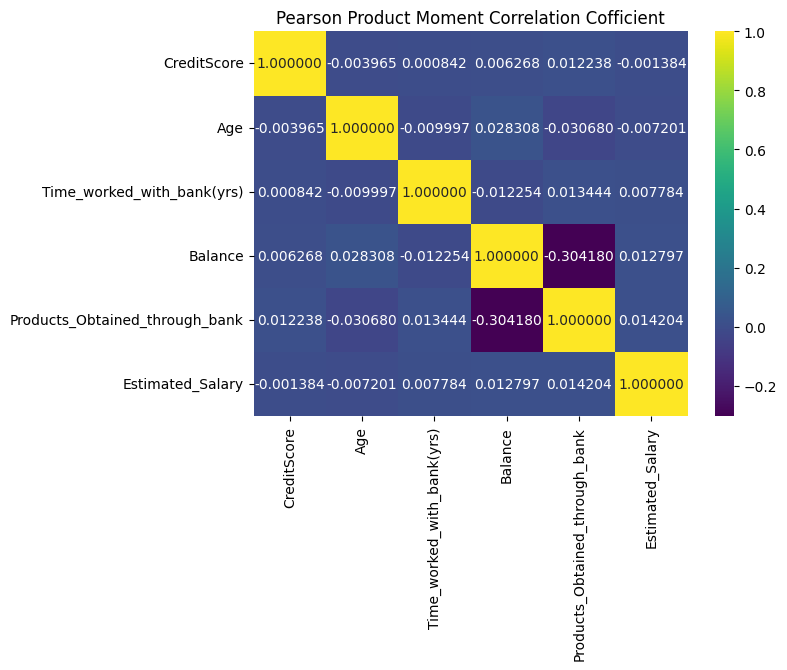

In [84]:
plt.figure(figsize=(7,5))
heatmap=sns.heatmap(pearson_correlation_matrix,annot=True,cmap='viridis',fmt='2f')
plt.title('Pearson Product Moment Correlation Cofficient')
plt.show()

In [85]:
spearman_correlation_matrix=df[['CreditScore','Age','Time_worked_with_bank(yrs)','Balance','Products_Obtained_through_bank','Estimated_Salary']].corr(method='spearman')

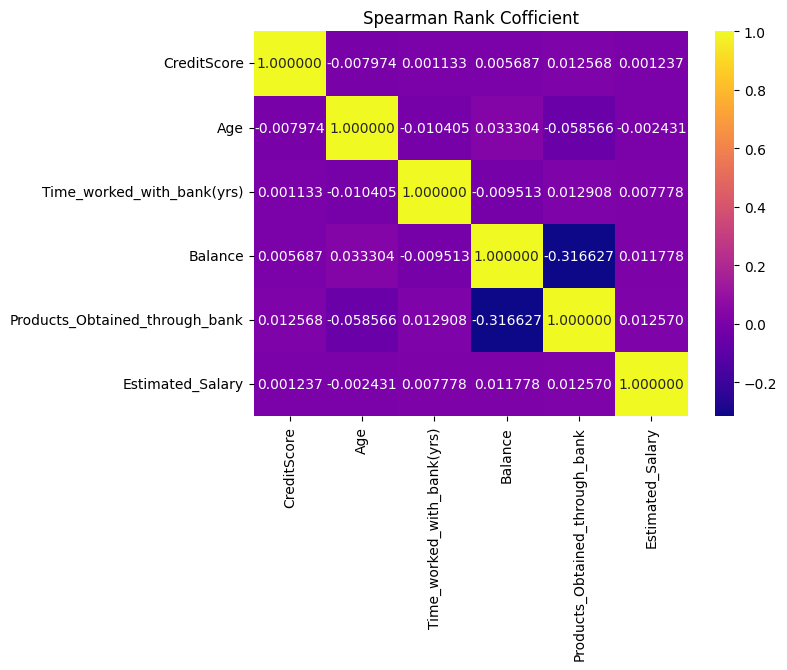

In [86]:
plt.figure(figsize=(7,5))
heatmap=sns.heatmap(spearman_correlation_matrix,annot=True,cmap='plasma',fmt='2f') 
plt.title('Spearman Rank Cofficient')
plt.show()
#cmap- is a color map used for visualisation it includes coolwarm,viridis,inferno,plasma, Greens,Blues,Reds,autumn,spring,winter,summer,civids
# fmt allows to specify the format  of numeric values displayed in annotation

#                                                          Hypothesis Test

##### categories of interest : gender and exited

In [87]:
category1 = df[['Gender','Exited']] 

##### see how the contingency table will look like

In [88]:
category1.value_counts() 

Gender  Exited
Male    No        4559
Female  No        3404
        Yes       1139
Male    Yes        898
Name: count, dtype: int64

#### creating a contigency table

In [89]:
category1_chi1 = pd.crosstab(index = df['Gender'],columns = df['Exited'])

In [90]:
category1_chi1

Exited,No,Yes
Gender,,
Female,3404,1139
Male,4559,898


### Defining the null hypothesis and its alternative

#### null hypo(H0)- There is no association of gender for the exit of our customers 
#### alternative hypo(H1)-There is association of gender for the exit of our customers 


### Rejection criteria
#### reject H0 if p_value > alpha

In [91]:
scores=chi2_contingency(category1_chi1)

#### calculating the chi-squared vlue, p_value,degree of freedom and the expected values

In [92]:
scores

Chi2ContingencyResult(statistic=112.91857062096116, pvalue=2.2482100097131755e-26, dof=1, expected_freq=array([[3617.5909,  925.4091],
       [4345.4091, 1111.5909]]))

In [93]:
stats,p_value,a,b=scores

### Decision Rule:

In [94]:
alpha = 0.05

if p_value < alpha:
    print(f'with p_value of {p_value} we can conclude with a confidence of 95% that ')
    print('there is dependence between the gender and exited')
else:
    print(f' with p_value of {p_value} we fail to reject the H0 and conclude with a ')
    print('confidence of 95% that there is independence between the gender and exited')

with p_value of 2.2482100097131755e-26 we can conclude with a confidence of 95% that 
there is dependence between the gender and exited


#### filtering the 2 categories of interest from the dataset : has a credit card and exited

In [95]:
category2 = df[['Has_CrCard','Exited']]

#### see how the contigency table will look like

In [96]:
category2.value_counts()

Has_CrCard  Exited
Yes         No        5631
No          No        2332
Yes         Yes       1424
No          Yes        613
Name: count, dtype: int64

##### creating a contigency table

In [97]:
category2 = pd.crosstab(index = df['Has_CrCard'],columns = df['Exited'])

In [98]:
category2

Exited,No,Yes
Has_CrCard,,
No,2332,613
Yes,5631,1424


### Defining the null hypothesis and its alternative

#### null hypo(H0)- There is no association of Has_CrCard for the exit of our customers 
#### alternative hypo(H1)-There is association of Has_CrCard for the exit of our customers 

### Rejection criteria
#### reject H0 if p_value > alpha

#### Calculating the statistic value , p value,expected values and degree of freedom

In [99]:
scores2 = chi2_contingency(category2)

In [100]:
scores2

Chi2ContingencyResult(statistic=0.47133779904440803, pvalue=0.49237236141554686, dof=1, expected_freq=array([[2345.1035,  599.8965],
       [5617.8965, 1437.1035]]))

In [101]:
stats,p_value,c,d = scores2

#### Decision Rule:

In [102]:
alpha = 0.05

if p_value < alpha:
    print(f'with p_value as {p_value} we can conclude with a ')
    print('confidence of 95% that there is dependence between having a credit card and exited')
else:
    print(f' with p_value as {p_value} we fail to reject the null hypothesis and conclude with a ')
    print('confidence of 95% that there is independence between having a credit card and exited')

 with p_value as 0.49237236141554686 we fail to reject the null hypothesis and conclude with a 
confidence of 95% that there is independence between having a credit card and exited


#### 2 categories of interest from the dataset : has a exited and is active member

In [103]:
category3 = df[['Is_Active_Member','Exited']] 

 #####  see how the contigency table will look like

In [104]:
category3.value_counts()

Is_Active_Member  Exited
Yes               No        4416
No                No        3547
                  Yes       1302
Yes               Yes        735
Name: count, dtype: int64

####  creating a contigency table

In [105]:
category3 = pd.crosstab(index = df['Is_Active_Member'],columns = df['Exited'])

In [106]:
category3

Exited,No,Yes
Is_Active_Member,,
No,3547,1302
Yes,4416,735


### Defining the null hypothesis and its alternative

#### null hypo(H0)- There is no association of Is_Active_Member for the exit of our customers 
#### alternative hypo(H1)-There is association of Is_Active_Member for the exit of our customers 

### Rejection criteria
#### reject H0 if p_value > alpha

#### calculating a chi-squared value , p_value ,degree of freedom and the expected values

In [107]:
scores3 = chi2_contingency(category3)

In [108]:
scores3

Chi2ContingencyResult(statistic=242.98534164287963, pvalue=8.785858269303703e-55, dof=1, expected_freq=array([[3861.2587,  987.7413],
       [4101.7413, 1049.2587]]))

In [109]:
stats,p_value,e,f = scores3

#### Decision Rule:

In [110]:
alpha = 0.05
if p_value < alpha:
    print('There is a significant relationship between being an active member to the bank and exited with 95% ')
    print(f'level of confidence for the p value of {p_value}')
else:
          print("The relationship between being an active member to the bank and exited from it with 95 % ")
          print(f' level of confidence when p_value is {p_value} is insignificant')

There is a significant relationship between being an active member to the bank and exited with 95% 
level of confidence for the p value of 8.785858269303703e-55


#### 2 variables of interest : country lived and exited

In [111]:
country_lived_exited = df[['Country_lived','Exited']]

In [112]:
country_lived_exited.value_counts()

Country_lived  Exited
France         No        4204
Spain          No        2064
Germany        No        1695
               Yes        814
France         Yes        810
Spain          Yes        413
Name: count, dtype: int64

####  creating a contingency table

In [113]:
country_lived_exited = pd.crosstab(index = df['Country_lived'],columns = df['Exited'])
country_lived_exited

Exited,No,Yes
Country_lived,,
France,4204,810
Germany,1695,814
Spain,2064,413


## Defining the null hypothesis and its alternative
#### H0 : The relationship between the country lived and being exited is  insignifiant    
#### H1 :There is significant relationship between the country lived and being exited  

### Rejection criteria
#### reject H0 if p_value>alpha

#####  creating a contingency table

In [114]:
score4 = chi2_contingency(country_lived_exited)

In [115]:
score4

Chi2ContingencyResult(statistic=301.25533682434536, pvalue=3.8303176053541544e-66, dof=2, expected_freq=array([[3992.6482, 1021.3518],
       [1997.9167,  511.0833],
       [1972.4351,  504.5649]]))

In [116]:
stats,p_value,g,h = score4

### Decision Rule:

In [117]:
alpha = 0.05
if p_value < alpha:
    print('There is a significant relationship between the country lived and being exited from the bank with a ')
    print(f'95% level of confidence at {p_value}')

else:
    print("There is independence relationship between the country lived and being exited from the bank with ")
    print(f"95 % level of confidence at a p_value of {p_value}")
          

There is a significant relationship between the country lived and being exited from the bank with a 
95% level of confidence at 3.8303176053541544e-66


#### categories of interest : Time_worked_with_bank(yrs) and Exited

In [118]:
time = df[['Time_worked_with_bank(yrs)','Exited']]

In [119]:
time.value_counts()

Time_worked_with_bank(yrs)  Exited
7                           No        851
2                           No        847
8                           No        828
1                           No        803
5                           No        803
3                           No        796
4                           No        786
9                           No        771
6                           No        771
10                          No        389
0                           No        318
1                           Yes       232
3                           Yes       213
9                           Yes       213
5                           Yes       209
4                           Yes       203
2                           Yes       201
8                           Yes       197
6                           Yes       196
7                           Yes       177
10                          Yes       101
0                           Yes        95
Name: count, dtype: int64

#### Creating a contingency table

In [120]:
time = pd.crosstab(index = df['Time_worked_with_bank(yrs)'],columns = df['Exited'])

In [121]:
time

Exited,No,Yes
Time_worked_with_bank(yrs),,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


## Defining the null hypothesis and its alternative
#### H0 : The relationship between the Time_worked_with_bank(yrs) and being exited is insignifiant    
#### H1 :There is significant relationship between the Time_worked_with_bank(yrs) and being exite

### Rejection criteria:
   ##### reject H0 if p_value > alpha

##### calculating the chi-squared value,p_value,degree of freedom and expected values

In [122]:
score5 = chi2_contingency(time)
score5

Chi2ContingencyResult(statistic=13.900372600390284, pvalue=0.17758462026413294, dof=10, expected_freq=array([[328.8719,  84.1281],
       [824.1705, 210.8295],
       [834.5224, 213.4776],
       [803.4667, 205.5333],
       [787.5407, 201.4593],
       [805.8556, 206.1444],
       [770.0221, 196.9779],
       [818.5964, 209.4036],
       [816.2075, 208.7925],
       [783.5592, 200.4408],
       [390.187 ,  99.813 ]]))

In [123]:
stats,p_value,h,i = score5

#### Decision Rule:

In [124]:
alpha = 0.05
if p_value < alpha:
    print('There is significant relationship between the time spent as a customer and ')
    print(f'exited from the bank with 95% level of confidence at pvalue {p_value}')
    
    
else:
    print('we fail to reject the null hypothesis and conclude that there is insignificant linear relationship between ')
    print(f'the time taken as a customer to the bank and being exited from it with a 95% level of confidence at  {p_value}')

we fail to reject the null hypothesis and conclude that there is insignificant linear relationship between 
the time taken as a customer to the bank and being exited from it with a 95% level of confidence at  0.17758462026413294


#### variables of interest : Products_Obtained_through_bank and Exited

In [125]:
property_obtained = df[['Products_Obtained_through_bank','Exited']]

In [126]:
property_obtained.value_counts()

Products_Obtained_through_bank  Exited
2                               No        4242
1                               No        3675
                                Yes       1409
2                               Yes        348
3                               Yes        220
4                               Yes         60
3                               No          46
Name: count, dtype: int64

#### creating a contingency table

In [127]:
property_obtained = pd.crosstab(index = df['Products_Obtained_through_bank'],columns = df['Exited'])

In [128]:
property_obtained

Exited,No,Yes
Products_Obtained_through_bank,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


## Defining the null hypothesis and its alternative
#### H0 : The relationship between the Products_Obtained_through_bank and being exited is insignifiant    
#### H1 :There is significant relationship between the Products_Obtained_through_bank) and being exited

### Rejection criteria:
   ##### reject H0 if p_value > alpha

#### calculating the chi-squared value,p_value,degree of freedom and expected values

In [129]:
score6 = chi2_contingency(property_obtained)
score6

Chi2ContingencyResult(statistic=1503.6293615070408, pvalue=0.0, dof=3, expected_freq=array([[4048.3892, 1035.6108],
       [3655.017 ,  934.983 ],
       [ 211.8158,   54.1842],
       [  47.778 ,   12.222 ]]))

In [130]:
stats,p_value,j,k = score6

#### Decision  Rule:

In [131]:
alpha = 0.05
if p_value > alpha:
    print('We accept the the null hypothesis and conclude that there is no significant relationship between ')
    print(f'the number of property obtained and being exited from the bank at {p_value} with a 95% level of confidence')
    
    
else:
    print('We reject the null hypothesis and conclude that there is significant relationship between ')
    print(f'the number of property obtained and being exited from it at {p_value} with 95% level of confidence')

We reject the null hypothesis and conclude that there is significant relationship between 
the number of property obtained and being exited from it at 0.0 with 95% level of confidence


#### variables of interest: Is_Active_Member and Gender

#### creating a contingency table

In [132]:
is_act_member = pd.crosstab(index = df['Gender'],columns = df['Is_Active_Member'])

In [133]:
is_act_member

Is_Active_Member,No,Yes
Gender,,
Female,2259,2284
Male,2590,2867


## Defining the null hypothesis and its alternative
#### H0 : The relationship between the Is_Active_Member and being Gender is insignifiant    
#### H1 :There is significant relationship between the Is_Active_Member and Gender

### Rejection criteria:
   ##### reject H0 if p_value > alpha

 #### calculating the chi-squared value,p_value,degree of freedom and expected values

In [134]:
score7 = chi2_contingency(is_act_member)
score7

Chi2ContingencyResult(statistic=4.992271810534194, pvalue=0.025460760707196283, dof=1, expected_freq=array([[2202.9007, 2340.0993],
       [2646.0993, 2810.9007]]))

In [135]:
stats,p_value,x,y = score7

#### Decision Rule:

In [136]:
alpha = 0.05
if p_value < alpha:
    print('We reject the null hypothesis and conclude that there is a significant linear relationship between ')
    print(f'gender and being an active member for the bank at {p_value} with a 95% level of confidence')
    
else:
    print('We fail to reject the null hypothesis and conclude that there is insignificant linear ')
    print(f'relationship between being an active member and gender with 95% level of confidennce at {p_value}')

We reject the null hypothesis and conclude that there is a significant linear relationship between 
gender and being an active member for the bank at 0.025460760707196283 with a 95% level of confidence
